In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [56]:
data.info()
#no null value is present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [57]:
data=pd.get_dummies(data)

In [58]:
data.loc[data['Taxable.Income']<=30000,'Target_variable']='Risky'
data.loc[data['Taxable.Income']>30000,'Target_variable']='Good'
#as per problem statement if taxable income less than 30k then it should be in risky catogery
#so here I added new column that is Target_variable
#then I will apply LabelEncoding on Targetvariable.
#We can not use bins method here because it doesn't give us cut of data as mentioned in problem statement

In [60]:
data['Target_variable'].value_counts()

Good     476
Risky    124
Name: Target_variable, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder
scalar=LabelEncoder()
data['Target_variable']=scalar.fit_transform(data['Target_variable'])

In [62]:
data['Target_variable'].value_counts()
#0-->Good
#1-->Risky

0    476
1    124
Name: Target_variable, dtype: int64

# Builded Model Using Entropy Criterion

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [63]:
X=data.drop('Target_variable',axis=1)
y=data['Target_variable']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)

In [69]:
accuracy=[]
for i in range(1,50):
    model=DecisionTreeClassifier(max_depth=i,criterion='entropy')
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    accuracy.append(np.mean(predict==y_test))

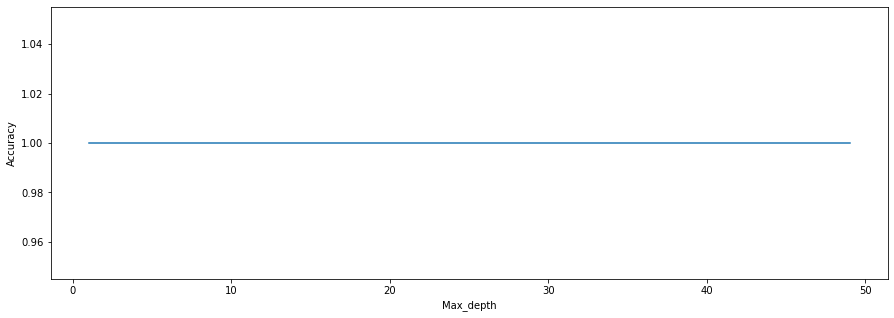

In [67]:
fig=plt.figure(figsize=(15,5))
plt.plot(range(1,50),accuracy)
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()
#builded perfect model i guess!!

[Text(167.4, 163.07999999999998, 'X[0] <= 30041.5\nentropy = 0.736\nsamples = 420\nvalue = [333, 87]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 87\nvalue = [0, 87]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 333\nvalue = [333, 0]')]

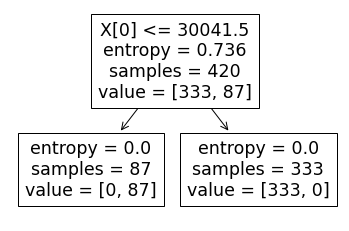

In [75]:
model=DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(X_train,y_train)
tree.plot_tree(model)

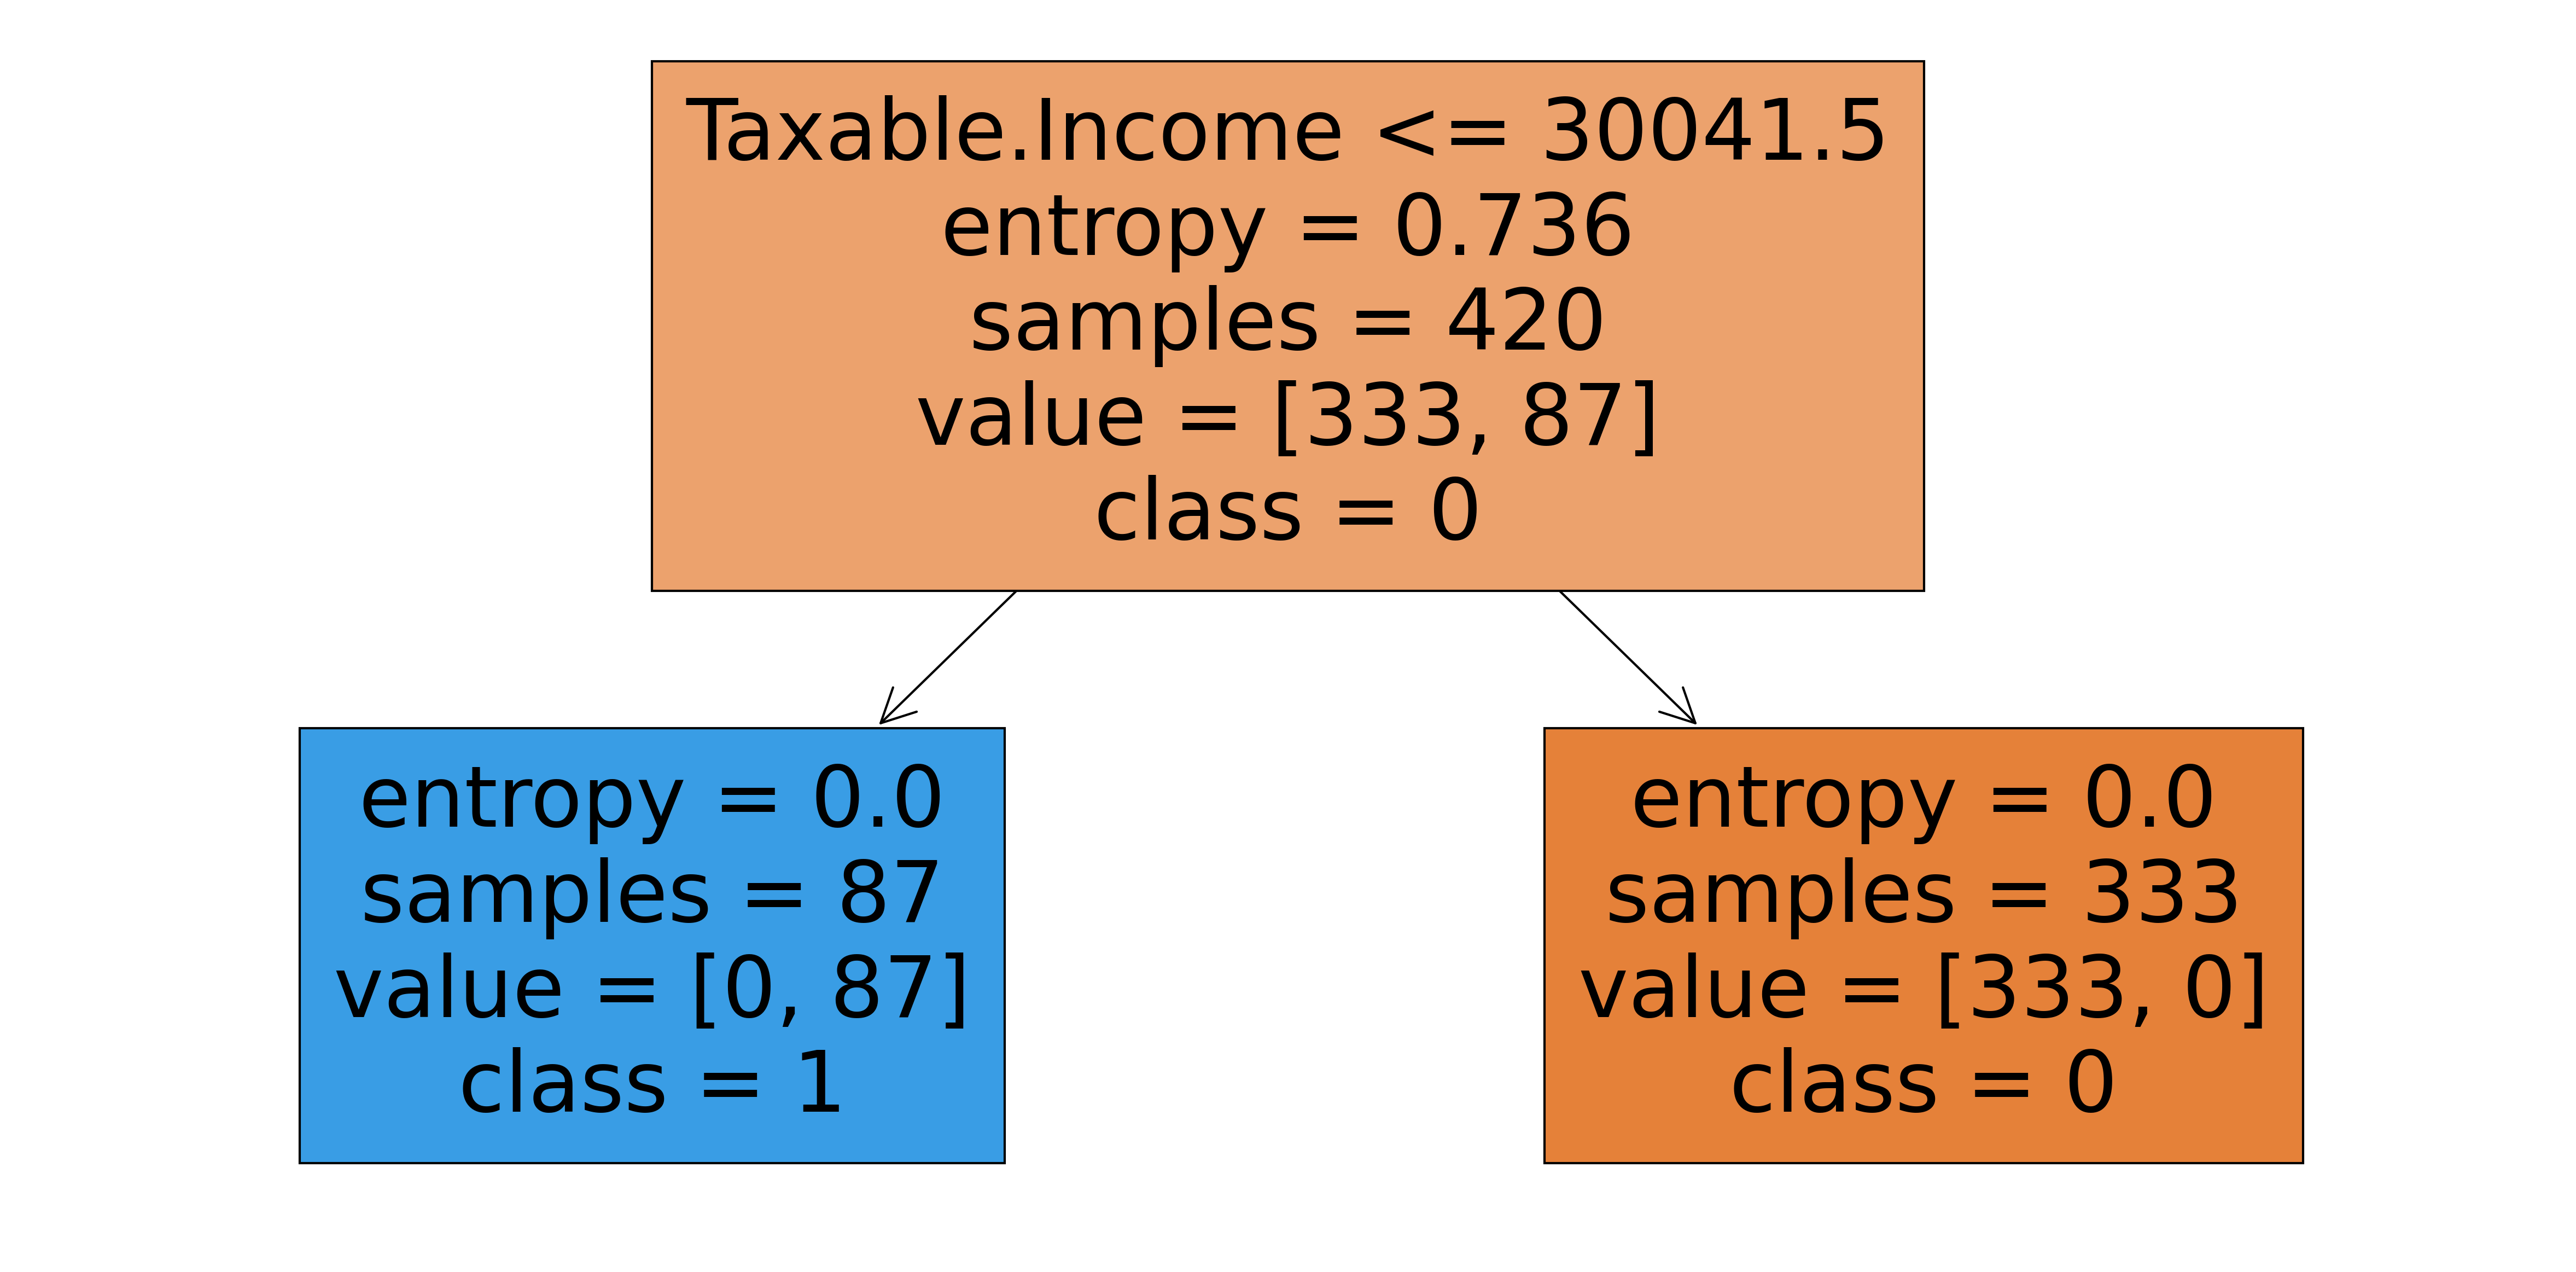

In [76]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=300)
tree.plot_tree(model,
               feature_names =X_train.columns, 
               class_names=['0','1','2'],
               filled = True);

In [71]:
from sklearn.metrics import classification_report
print(classification_report(predict,y_test))
#model is perfect!!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        37

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



# Builded Model using Gini Criterion

In [77]:
accuracy=[]
for i in range(1,50):
    model=DecisionTreeClassifier(max_depth=i,criterion='gini')
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy.append(np.mean(pred==y_test))

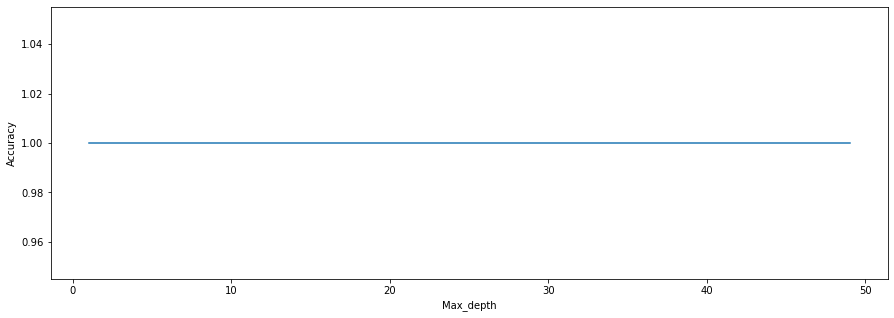

In [78]:
fig=plt.figure(figsize=(15,5))
plt.plot(range(1,50),accuracy)
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()
#Both model is perfect!!